In [2]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import tensorflow_hub as hub
import tensorflow_text as text
import tensorflow as tf

In [3]:
# Adresses des deux modèles pré-entrainés BERT
# https://tfhub.dev/google/collections/bert/1
# The BERTBase model uses 
# => 12 layers of transformers block
# => Hidden size of 768 
# => Number of self-attention heads is 12 
# => Has around 110M trainable parameters
bert_encoder_url="https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4"
# BERT Text Preprocessing
bert_preprocess_url="https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"

In [4]:
# Model de prétraitement du texte 
# Permet d'attribuer un code à chaque mot de chaque phrase selon un vocabulaire (Dictionaire) prédifini dans BERT
# Chaque phrase commence pour un tokden spécial CLS et se termine par un soken Special SEP
bert_preprocess_model=hub.KerasLayer(bert_preprocess_url)
# Permet d'encoder les phrases avec un vecteur de dimension 768 en leurs donnant un sens dans leurs contextes 
bert_encoder_model=hub.KerasLayer(bert_encoder_url)

Metal device set to: Apple M1 Max

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



2023-06-30 20:43:01.378529: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [5]:
# Exemple simple de texte à encoder
review_test=["Hello my name is mohamed","today we are talking about transformers"]

In [6]:
# Préparation du texte 
#  => Pour chaque phrase,
#    => Ajouter les délimiteurs spéciaux CLS et SEP 
#    => Pour chaque mot (Token), 
#       => attribuer un code le représentant dans le vocabulaire
preprocessed_text=bert_preprocess_model(review_test)
# Encoder le texte préparé dans l'étape précédente pour calculer le sens de chaque pharse dans le son contexte
encoded_text=bert_encoder_model(preprocessed_text)

In [7]:
preprocessed_text.keys()

dict_keys(['input_type_ids', 'input_mask', 'input_word_ids'])

In [8]:
# Afficher les IDs attribués à chaque mot de la première phrase
# Chaque phrase est représentée dans un vecteur de dimension 128
# 128 représente le maximum de mots qu'on peut avoir dans une phrase
# Le début de chaque phrase est marquée par le token spécial CLS
# La fin de chaque phrase est marquée par le token spécial SEP
# Le reste des 128 Octets sont des ZERO (Padding)
preprocessed_text['input_word_ids'][0]
# CLS(101) Hello my name is mohamed SEP(102)

<tf.Tensor: shape=(128,), dtype=int32, numpy=
array([  101,  7592,  2026,  2171,  2003, 14467,   102,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,   

In [79]:
preprocessed_text['input_mask'][0]

<tf.Tensor: shape=(128,), dtype=int32, numpy=
array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)>

In [9]:
encoded_text.keys()

dict_keys(['pooled_output', 'sequence_output', 'encoder_outputs', 'default'])

In [10]:
# Contextualized word embeeding
# Vecteur représentant l'encodage du permier mot de la première phrase
# Le vecteur est de dimension 768 représentant le sens du mot dans son son contexte
# Ce vecteur est calculé grace au mécanisme d'attension (Multi Head Attention)
#  => Pour chaque mot, calculer son poids par rapport aux autres autres mots de la phrase et du contexte
encoded_text['sequence_output'][0][0]

<tf.Tensor: shape=(768,), dtype=float32, numpy=
array([ 1.13881275e-01,  3.06966960e-01, -1.34479269e-01, -2.24087924e-01,
       -1.73023298e-01, -2.19552577e-01,  1.43109560e-01,  4.75077331e-01,
       -1.47830561e-01, -3.31553817e-01,  1.86126515e-01, -1.79994583e-01,
        3.72473225e-02,  4.16999549e-01,  1.83585156e-02, -1.04494572e-01,
       -1.78568110e-01,  2.28355229e-01,  2.19092175e-01,  1.42559320e-01,
        1.66799128e-01, -1.49366185e-01,  1.29990935e-01,  1.39638230e-01,
       -5.73812909e-02,  5.24293445e-03, -5.11699766e-02,  3.27257849e-02,
       -2.32498497e-01, -1.57035902e-01, -1.15135103e-01, -9.20081511e-05,
       -4.08806577e-02,  5.03209382e-02,  5.45480056e-04,  2.97552831e-02,
       -1.30463064e-01,  9.98024642e-02, -2.11549476e-01, -7.85014182e-02,
       -1.96342900e-01,  1.74683183e-01, -7.73373619e-03,  1.96008533e-01,
       -1.15361109e-01, -4.11996961e-01, -2.71968937e+00, -6.62792176e-02,
       -2.74347007e-01, -4.76875812e-01,  1.63703397

In [11]:
# Contextualized sentence embeeding du dernier encodeur du stack
# Vecteur représentant le sens de la première phrase produit par le dernier bloc de l'encodeur à sa sortie
# Le vecteur est de dimension 768 (Nombre de features capturées)
# C'est ce vecteur que nous alons soumettre à un audre modèle de classifieur binaire notre cas de sentiment analysis
encoded_text['pooled_output'][0]

<tf.Tensor: shape=(768,), dtype=float32, numpy=
array([-6.71814084e-01, -2.08563313e-01,  5.40385187e-01,  2.97822684e-01,
       -3.23103756e-01,  3.30618620e-02,  6.52756333e-01,  8.87683183e-02,
        5.41845977e-01, -9.98861015e-01,  3.81980479e-01,  5.95086738e-02,
        9.74099338e-01, -3.59646559e-01,  8.89524221e-01, -3.76179129e-01,
        1.72169223e-01, -4.86407042e-01,  1.90916777e-01, -7.51642808e-02,
        3.96276712e-01,  9.01618063e-01,  6.90044582e-01,  1.66912705e-01,
        1.73067614e-01,  3.13725206e-03, -4.32857454e-01,  8.98188472e-01,
        9.29891407e-01,  5.74919701e-01, -3.70045990e-01, -1.56214954e-02,
       -9.83222544e-01, -7.20719323e-02,  2.33535275e-01, -9.67255175e-01,
        3.30537260e-02, -5.46805799e-01,  3.95775819e-03,  2.32533813e-01,
       -8.29940438e-01,  1.23403467e-01,  9.92418051e-01, -7.15207934e-01,
        2.06013732e-02, -2.02486500e-01, -9.96255219e-01,  6.86944574e-02,
       -8.02984416e-01, -5.42182684e-01, -2.22321346

In [12]:
# On peut consulter les vecteur des word embeeding produit par chaque encodeur du stack
# Dans ce modèle, il y a 12 encodeurs (Encoder Blocs)
len(encoded_text['encoder_outputs'])

12

In [13]:
# Vecteur Sentences embeeding produit par le premier Layer (Premier encodeur)
encoded_text['encoder_outputs'][0]

<tf.Tensor: shape=(2, 128, 768), dtype=float32, numpy=
array([[[ 1.6370770e-01, -1.2917660e-02, -8.5544161e-02, ...,
         -5.5640571e-02,  7.7056810e-02, -4.0374212e-03],
        [ 6.8490756e-01,  2.2906061e-01,  4.2973149e-01, ...,
         -6.9919772e-02,  1.1283965e+00, -8.6049455e-01],
        [ 3.6272675e-01,  7.0386779e-01, -2.7004313e-01, ...,
         -1.4301580e+00,  1.9512022e-01, -3.1736147e-01],
        ...,
        [ 2.2814989e-02, -2.6318786e-01,  6.7517495e-01, ...,
          1.6913837e-01, -1.9543624e-01,  6.4557746e-02],
        [-6.2420428e-02, -2.8490755e-01,  5.2300346e-01, ...,
          2.3012224e-01, -1.0437879e-01, -4.8348490e-02],
        [ 7.8978613e-02, -2.1633923e-01,  5.4142284e-01, ...,
          5.7035905e-01, -4.5299110e-01, -1.3315922e-01]],

       [[ 1.9218093e-01, -2.0531934e-02, -4.7158241e-02, ...,
          5.0367169e-02,  3.8603704e-02,  5.4225918e-02],
        [-7.7073467e-01,  3.2024723e-01, -1.4254761e+00, ...,
          5.7002378e-01,  7.

In [14]:
# le vecteur Word embeeding du denier encodeur est le même que celui représenté par la clé ['sequence_output']
encoded_text['encoder_outputs'][-1][0]==encoded_text['sequence_output'][0]

<tf.Tensor: shape=(128, 768), dtype=bool, numpy=
array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])>

In [15]:
# Charger les données
df=pd.read_csv('dataset.csv')

In [16]:
df.sample(10)

,review,sentiment
40828,As of this writing John Carpenter's 'Halloween...,positive
28510,"The subject is banal, even in 1942. It is war ...",positive
45581,"For a feature film, the plot closely follows h...",positive
34166,At first I thought that this one was supposed ...,negative
7973,When I first looked at the back of the cover o...,negative
25863,Wow. So my boyfriend and I went to the movie s...,negative
11270,"First of all, i have nothing against Christian...",negative
2746,Father and son communicate very little. IN fac...,positive
33588,"Certainly not a bad little low budget film, th...",negative
49445,This movie has been advertised for over three ...,negative


**Structure du Data set :**
- Deux colonnes :
    - review qui contient un texte repésentant le review d'un client
    - sentiment représentant le output indiquant si le client est satisfait (poistive) ou non (negative)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [18]:
df.review.isna().sum()

0

In [19]:
df.sentiment.isna().sum()

0

In [20]:
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

<Axes: xlabel='sentiment', ylabel='count'>

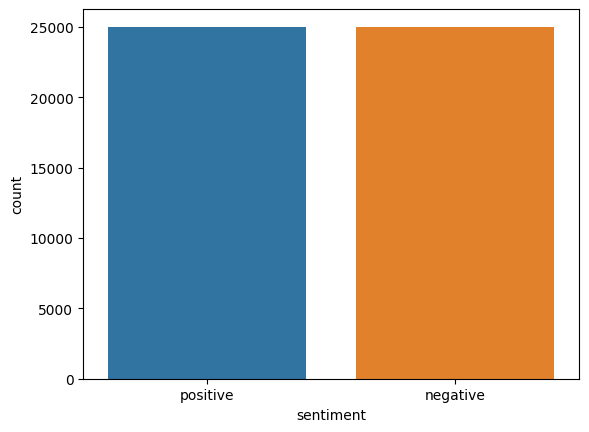

In [21]:
sns.countplot(x=df['sentiment'])

In [22]:
df.groupby('sentiment').describe()

review                                                            \
           count unique                                                top   
sentiment                                                                    
negative   25000  24698  This show comes up with interesting locations ...   
positive   25000  24884  Loved today's show!!! It was a variety and not...   

                
          freq  
sentiment       
negative     3  
positive     5

In [23]:
df['output']=df['sentiment'].apply(lambda x:1 if x=='positive' else 0)

In [24]:
df.sample(10)

,review,sentiment,output
28043,I was fortunate enough to catch a midnight scr...,positive,1
4866,The only reason I haven't given this film an a...,negative,0
24819,ultra cheezy soundtrack. vinnie tries really h...,negative,0
43838,So they hyped the violence and it's been brand...,negative,0
20984,Here's a horror version of PRISCILLA: QUEEN OF...,negative,0
36301,I don't know why all of the critics say this w...,positive,1
2883,The Beguiled was one of the few early Eastwood...,positive,1
49611,I caught this film late on a sat night/ Sunday...,positive,1
4296,"Calling this a ""Sunday School"" movie might be ...",negative,0
11812,Sometimes I just want to laugh. Don't you? No ...,positive,1


In [25]:
input_layer=tf.keras.layers.Input(shape=(), dtype=tf.dtypes.string, name="input_layer")
prepross_layer=bert_preprocess_model(input_layer)
encoder_layer=bert_encoder_model(prepross_layer)
dropout_layer=tf.keras.layers.Dropout(rate=0.1,name="dropout_layer")(encoder_layer['pooled_output'])
output_layer=tf.keras.layers.Dense(units=1,activation="sigmoid", name="output_layer")(dropout_layer)
model=tf.keras.Model(inputs=[input_layer],outputs=[output_layer])

In [26]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_layer (InputLayer)       [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_type_ids':   0           ['input_layer[0][0]']            
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128)}                                                  

In [29]:
METRICS = [
    tf.keras.metrics.BinaryAccuracy("accuracy"),
    tf.keras.metrics.Recall(),
    tf.keras.metrics.Precision()
]
model.compile(optimizer="adam", metrics=METRICS, loss="binary_crossentropy")

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    df['review'],
    df['output'],
    stratify=df['output'],
    test_size=0.2
    )

In [83]:
print("x_train shape => ",x_train.shape)
print("y_train shape => ",y_train.shape)
print("x_test shape => ",x_test.shape)
print("y_test shape => ",y_test.shape)

x_train shape =>  (40000,)
y_train shape =>  (40000,)
x_test shape =>  (10000,)
y_test shape =>  (10000,)


In [37]:
history=model.fit(x_train,y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1000/1000 [==============================] - 2653s 3s/step - loss: 0.6077 - accuracy: 0.6759 - recall_2: 0.6658 - precision: 0.6793 - val_loss: 0.5662 - val_accuracy: 0.7140 - val_recall_2: 0.8352 - val_precision: 0.6730
Epoch 2/10
1000/1000 [==============================] - 2693s 3s/step - loss: 0.5441 - accuracy: 0.7356 - recall_2: 0.7276 - precision: 0.7392 - val_loss: 0.5256 - val_accuracy: 0.7469 - val_recall_2: 0.7746 - val_precision: 0.7348
Epoch 3/10
1000/1000 [==============================] - 2764s 3s/step - loss: 0.5207 - accuracy: 0.7501 - recall_2: 0.7380 - precision: 0.7561 - val_loss: 0.5214 - val_accuracy: 0.7461 - val_recall_2: 0.8521 - val_precision: 0.7038
Epoch 4/10
1000/1000 [==============================] - 4138s 4s/step - loss: 0.5079 - accuracy: 0.7596 - recall_2: 0.7520 - precision: 0.7634 - val_loss: 0.5073 - val_accuracy: 0.7551 - val_recall_2: 0.8249 - val_precision: 0.7246
Epoch 5/10
1000/1000 [==============================] - 2779s 3s/step - 

In [38]:
model.save("./sentiment-analysis")

INFO:tensorflow:Assets written to: ./sentiment-analysis/assets


INFO:tensorflow:Assets written to: ./sentiment-analysis/assets


In [39]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 687s 2s/step - loss: 0.4757 - accuracy: 0.7757 - recall_2: 0.7140 - precision: 0.8145


[0.47574424743652344,
 0.775700032711029,
 0.7140000462532043,
 0.8145106434822083]

In [40]:
y_predicted=model.predict(x_test)

313/313 [==============================] - 686s 2s/step


In [52]:
import numpy as np
import matplotlib.pyplot as plt
y_predicted = np.where(y_predicted>0.5,1,0)

In [43]:
y_predicted

array([[1],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [44]:
from sklearn.metrics import confusion_matrix, classification_report

In [78]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.75      0.84      0.79      5000
           1       0.81      0.71      0.76      5000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.77     10000
weighted avg       0.78      0.78      0.77     10000



In [47]:
cm=confusion_matrix(y_test,y_predicted)
cm

array([[4187,  813],
       [1430, 3570]])

Text(50.722222222222214, 0.5, 'Truth')

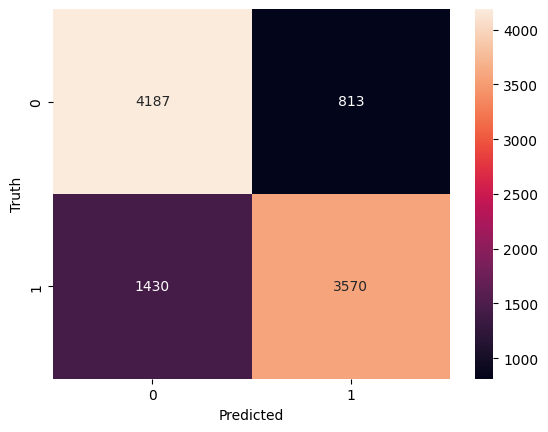

In [53]:
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

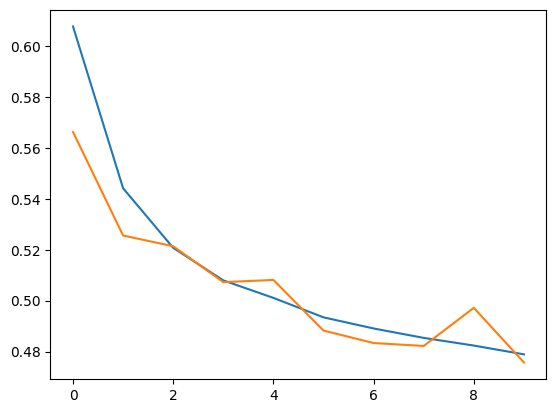

In [84]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [70]:
reviews=['Hello, i do not like', "i like", "bad experience","good look"]
predicted=model.predict(reviews)

1/1 [==============================] - 3s 3s/step


In [71]:
predicted=np.where(predicted>0.5,1,0)

In [72]:
predicted

array([[0],
       [1],
       [0],
       [1]])